# Medidas Estadísticas, Distribuciones, Escalado y Visualización


## Introducción

En el vasto y complejo mundo del análisis de datos y el Machine Learning, la comprensión profunda de las características de nuestros datos es un pilar fundamental. Más allá de las medidas básicas de tendencia central y dispersión, la forma en que los datos se distribuyen nos revela patrones y tendencias cruciales que son invisibles a primera vista. Este cuaderno interactivo de Google Colab está diseñado para ser una guía práctica, dinámica y pedagógica que te sumergirá en conceptos esenciales de estadística descriptiva y preprocesamiento de datos. Exploraremos la importancia de las distribuciones, cómo medir su forma a través de la asimetría y la curtosis, la desviación estándar, y la necesidad vital de escalar los datos mediante la normalización y la estandarización para preparar nuestros modelos de Machine Learning.

A lo largo de este cuaderno, utilizaremos el famoso conjunto de datos del Titanic para ilustrar cada concepto con ejemplos prácticos en Python y R, permitiéndote aplicar y experimentar con las técnicas aprendidas. Incluiremos todas las medidas estadísticas clave y diversas visualizaciones gráficas para una comprensión holística. ¡Prepárate para transformar tu comprensión de los datos y potenciar tus habilidades en ciencia de datos!

## 1. Estadística en Acción: Combinando Medidas para Analizar Datos

El verdadero poder de la estadística descriptiva surge cuando combinamos diversas medidas para obtener una comprensión profunda de nuestros datos. Al mirar la media, mediana, moda, desviación estándar y rango juntas, podemos pintar una imagen completa del comportamiento de una variable, desde su centro hasta su dispersión y la presencia de anomalías. ¡Es como tener una caja de herramientas completa para diagnosticar tus datos!


## Un Vistazo Holístico: Media, Mediana y Moda

Estas son nuestras medidas de tendencia central, que nos indican dónde se "centran" o agrupan la mayoría de los datos:

*   **Media:** El promedio simple de todos los valores. Es sensible a valores extremos (outliers).
*   **Mediana:** El valor central en un conjunto de datos ordenado. Es robusta a los outliers.
*   **Moda:** El valor que aparece con mayor frecuencia. Útil para datos categóricos o para identificar picos en la distribución.

**¿Por qué verlas juntas?** Compararlas nos da una idea rápida de la forma de la distribución:

*   Si `Media ≈ Mediana ≈ Moda`, la distribución es probablemente simétrica y cercana a una distribución normal.
*   Si `Media > Mediana > Moda`, la distribución tiene asimetría positiva (cola a la derecha), indicando la presencia de valores altos extremos.
*   Si `Media < Mediana < Moda`, la distribución tiene asimetría negativa (cola a la izquierda), indicando la presencia de valores bajos extremos.


## Explorando la Dispersión: Desviación Estándar y Rango

Estas medidas de dispersión nos dicen qué tan "extendidos" o variados están nuestros datos:

*   **Rango:** La diferencia entre el valor máximo y el mínimo. Es la medida más simple de dispersión, pero muy sensible a outliers.
*   **Desviación Estándar:** Mide la dispersión promedio de los datos con respecto a la media. Una desviación estándar baja indica que los puntos de datos tienden a estar cerca de la media; una desviación estándar alta indica que los puntos de datos están más extendidos. Es la medida de dispersión más utilizada y robusta.
    (La varianza es el cuadrado de la desviación estándar, útil en cálculos teóricos).

**Combinándolas:** Un rango muy amplio junto con una desviación estándar alta puede indicar una gran variabilidad, o la presencia de valores atípicos que necesitan ser investigados. Si la media y la mediana son similares, pero la desviación estándar es muy alta, sugiere que los datos están ampliamente dispersos pero aún de forma simétrica.

## 2. Limpieza de Datos: Preparando el Terreno para el Análisis

Antes de sumergirnos en el análisis de distribuciones o aplicar técnicas de escalado, es imperativo asegurar la calidad de nuestros datos. La limpieza de datos es un paso crítico en el preprocesamiento que implica identificar y corregir errores, inconsistencias y valores faltantes en el conjunto de datos. Un dataset "sucio" puede llevar a análisis sesgados, modelos ineficaces y conclusiones erróneas. En esta sección, exploraremos algunas de las tareas de limpieza de datos más comunes utilizando nuestro dataset de ejemplo.

Para este cuaderno, utilizaremos el famoso dataset del Titanic, que contiene información sobre los pasajeros del trágico viaje, incluyendo su estado de supervivencia, edad, sexo, clase de billete, etc. Este dataset es ideal para demostrar la limpieza de datos debido a la presencia de valores faltantes y la necesidad de transformaciones.


## Carga del Dataset y Exploración Inicial

Primero, cargaremos el dataset y realizaremos una exploración inicial para entender su estructura y detectar posibles problemas. Utilizaremos `.info()` para obtener un resumen conciso del DataFrame, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos, y `.describe()` para obtener estadísticas descriptivas de las columnas numéricas.

In [3]:
import pandas as pd

# Cargar el dataset del Titanic
df = pd.read_csv("titanic.csv")

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar información general del dataset (incluye tipos de datos y valores no nulos)
print("\nInformación general del dataset (df.info()):")
df.info()

# Mostrar estadísticas descriptivas (df.describe())
print("\nEstadísticas descriptivas del dataset (df.describe()):")
print(df.describe())

Primeras 5 filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

## Manejo de Valores Faltantes

Los valores faltantes (NaN, None, etc.) son un problema común en los datasets reales. Pueden ocurrir por diversas razones, como errores en la recolección de datos, información no disponible o fallos en el sistema. Es crucial identificar y manejar estos valores adecuadamente, ya que muchos algoritmos de Machine Learning no pueden trabajar directamente con ellos.

Existen varias estrategias para manejar los valores faltantes:

1.  **Eliminación:**
    *   **Eliminar filas:** Si una fila tiene muchos valores faltantes o si el número de filas con valores faltantes es pequeño en comparación con el tamaño total del dataset, se pueden eliminar las filas completas. Sin embargo, esto puede resultar en la pérdida de información valiosa si se eliminan demasiadas filas.
    *   **Eliminar columnas:** Si una columna tiene un porcentaje muy alto de valores faltantes (ej. > 70-80%), puede ser más sensato eliminar la columna completa, ya que no aportaría mucha información útil.

2.  **Imputación:** Reemplazar los valores faltantes con un valor estimado. Las técnicas de imputación comunes incluyen:
    *   **Media/Mediana/Moda:** Reemplazar los valores faltantes con la media (para datos numéricos sin valores atípicos), la mediana (para datos numéricos con valores atípicos) o la moda (para datos categóricos) de la columna.
    *   **Imputación por regresión:** Utilizar un modelo de regresión para predecir los valores faltantes basándose en otras columnas del dataset.
    *   **Imputación por k-NN:** Reemplazar los valores faltantes basándose en los valores de los k vecinos más cercanos.

**Ejemplo práctico: Manejo de valores faltantes en el dataset del Titanic**

Primero, identifiquemos la cantidad de valores faltantes por columna:

In [4]:
# Contar valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Observamos que las columnas `Age`, `Cabin` y `Embarked` tienen valores faltantes. La columna `Cabin` tiene un porcentaje muy alto de valores faltantes, por lo que podríamos considerar eliminarla. Para `Age` y `Embarked`, podemos imputar los valores.

In [5]:
# Estrategia 1: Eliminar la columna 'Cabin' debido a la gran cantidad de valores faltantes
df_cleaned = df.drop('Cabin', axis=1)
print('\nDataset después de eliminar la columna Cabin:')
print(df_cleaned.head())

# Estrategia 2: Imputar valores faltantes en 'Age' con la mediana (más robusta a outliers que la media)
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
print('\nValores faltantes en Age después de la imputación:')
print(df_cleaned['Age'].isnull().sum())

# Estrategia 3: Imputar valores faltantes en 'Embarked' con la moda (el puerto de embarque más frecuente)
# Primero, encontramos la moda
most_frequent_embarked = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(most_frequent_embarked, inplace=True)
print('\nValores faltantes en Embarked después de la imputación:')
print(df_cleaned['Embarked'].isnull().sum())

# Verificar que no queden valores faltantes (excepto en columnas que no se hayan tocado)
print('\nValores faltantes finales por columna:')
print(df_cleaned.isnull().sum())


Dataset después de eliminar la columna Cabin:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500   

/tmp/ipython-input-5-3254200097.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
/tmp/ipython-input-5-3254200097.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

#

## Manejo de Duplicados

Los registros duplicados pueden sesgar el análisis y los modelos, ya que dan un peso indebido a ciertas observaciones. Es importante identificarlos y eliminarlos si representan entradas redundantes.

In [6]:
# Identificar filas duplicadas
duplicates = df_cleaned.duplicated()
print('\nNúmero de filas duplicadas antes de la eliminación:', duplicates.sum())

# Eliminar filas duplicadas
df_cleaned.drop_duplicates(inplace=True)
print('Número de filas duplicadas después de la eliminación:', df_cleaned.duplicated().sum())
print('Forma del dataset después de eliminar duplicados:', df_cleaned.shape)


Número de filas duplicadas antes de la eliminación: 0
Número de filas duplicadas después de la eliminación: 0
Forma del dataset después de eliminar duplicados: (891, 11)


#

## Corrección de Tipos de Datos

Algunas columnas pueden ser cargadas con un tipo de dato incorrecto (ej. números como strings, o categorías como números). Es fundamental asegurar que cada columna tenga el tipo de dato apropiado para el análisis y modelado.

In [7]:
# Verificar tipos de datos actuales
print('\nTipos de datos actuales:')
print(df_cleaned.dtypes)

# Ejemplo: Si 'Survived' fuera un número pero quisiéramos tratarlo como categoría
# df_cleaned['Survived'] = df_cleaned['Survived'].astype('category')
# print('\nTipo de dato de Survived después de la conversión:')
# print(df_cleaned['Survived'].dtype)

# Para este dataset, los tipos de datos son generalmente correctos para las columnas que usaremos en el análisis.
# Sin embargo, es una buena práctica revisar y ajustar si es necesario.


Tipos de datos actuales:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


Con estos pasos, hemos realizado una limpieza básica pero efectiva de nuestro dataset, dejándolo en un estado mucho más adecuado para el análisis exploratorio y la construcción de modelos. La calidad de los datos es la base sobre la que se construye cualquier análisis robusto.

## 3. Comprendiendo el Comportamiento de tus Datos: Las Distribuciones

La distribución de los datos es un concepto estadístico que describe cómo se agrupan o dispersan los valores de una variable. Nos proporciona una visión de la frecuencia con la que ocurren diferentes valores en un conjunto de datos, revelando su forma, centro y dispersión. Comprender la distribución de una variable es crucial porque muchos modelos estadísticos y algoritmos de Machine Learning asumen ciertas distribuciones para funcionar de manera óptima. Ignorar la distribución de los datos puede llevar a conclusiones erróneas y a modelos predictivos ineficaces.


## La Distribución Normal: La 'Reina' de las Distribuciones

La distribución normal, también conocida como distribución gaussiana o "curva de campana", es, sin lugar a dudas, la distribución de probabilidad más importante y omnipresente en la estadística. Su relevancia radica en que muchos fenómenos naturales, sociales y económicos se aproximan a esta distribución. Ejemplos clásicos incluyen la altura de las personas, los errores de medición en experimentos científicos, las puntuaciones en exámenes estandarizados, y la presión arterial en una población sana. Su forma simétrica y predecible la convierte en una herramienta poderosa para la inferencia estadística.

**Características clave de la Distribución Normal:**

*   **Simetría:** Es perfectamente simétrica alrededor de su media. Esto significa que si dobláramos la curva por la mitad, ambas mitades coincidirían. En una distribución normal, la media, la mediana y la moda son idénticas y se encuentran en el centro de la distribución.
*   **Forma de Campana:** Posee una forma distintiva que se asemeja a una campana, con la mayoría de los datos agrupados cerca del centro y la frecuencia disminuyendo gradualmente a medida que nos alejamos del centro en ambas direcciones.
*   **Asintótica:** Las colas de la distribución se extienden infinitamente en ambas direcciones, acercándose al eje horizontal pero nunca tocándolo.
*   **Parámetros:** Está completamente definida por dos parámetros: su media (μ), que determina la ubicación del centro de la campana, y su desviación estándar (σ), que controla la dispersión o el "ancho" de la campana. Una desviación estándar pequeña indica que los datos están muy agrupados alrededor de la media, mientras que una grande sugiere una mayor dispersión.

**¿Cómo detectar una distribución normal?**

Detectar si un conjunto de datos sigue una distribución normal es un paso fundamental en el análisis exploratorio de datos. Existen varias aproximaciones para ello:

1.  **Visualmente:** La forma más intuitiva es crear un histograma de los datos. Si el histograma se asemeja a una campana simétrica, es una buena indicación de normalidad. Otra herramienta visual útil es el gráfico Q-Q (quantile-quantile plot), que compara los cuantiles de la distribución de nuestros datos con los cuantiles de una distribución normal teórica. Si los puntos se alinean aproximadamente a lo largo de una línea recta, sugiere normalidad.
2.  **Pruebas Estadísticas:** Para una evaluación más rigurosa, se utilizan pruebas de hipótesis formales. Las más comunes incluyen:
    *   **Prueba de Shapiro-Wilk:** Es una de las pruebas más potentes para la normalidad y es adecuada para tamaños de muestra pequeños a moderados (generalmente n < 50). La hipótesis nula es que los datos provienen de una distribución normal.
    *   **Prueba de Kolmogorov-Smirnov (Lilliefors):** Esta prueba compara la función de distribución acumulada de los datos con la de una distribución normal. Es más adecuada para muestras grandes. Una variante común es la prueba de Lilliefors, que se utiliza cuando la media y la desviación estándar de la población no se conocen (lo cual es lo más común en la práctica).
    *   **Prueba de Anderson-Darling:** Similar a Kolmogorov-Smirnov, pero da más peso a las colas de la distribución, lo que la hace más sensible a las desviaciones de la normalidad en los extremos.

Es importante recordar que estas pruebas no "prueban" que una distribución es normal, sino que no encuentran evidencia suficiente para rechazar la hipótesis de normalidad. Un p-valor alto (típicamente > 0.05) sugiere que no hay evidencia para rechazar la normalidad. Sin embargo, para muestras muy grandes, incluso pequeñas desviaciones de la normalidad pueden resultar en un p-valor bajo, por lo que la inspección visual siempre debe complementar las pruebas estadísticas.

## 4. Análisis de Distribución, Asimetría y Curtosis

Una vez que nuestros datos están limpios, el siguiente paso es comprender sus características estadísticas, especialmente la forma de sus distribuciones. Esto nos ayudará a identificar patrones, detectar anomalías y tomar decisiones informadas sobre el preprocesamiento adicional o la selección de modelos. En esta sección, aplicaremos los conceptos de distribución, asimetría y curtosis a nuestro dataset del Titanic.


## Cálculo de Asimetría (Skewness)

La asimetría cuantifica la simetría de la distribución. Un valor de 0 indica simetría perfecta, valores positivos indican sesgo a la derecha y valores negativos indican sesgo a la izquierda.

In [8]:
# Calcular la asimetría para las columnas numéricas
print("\nAsimetría (Skewness):")
print(df_cleaned[["Age", "Fare", "Pclass", "SibSp", "Parch"]].skew())


Asimetría (Skewness):
Age       0.510245
Fare      4.787317
Pclass   -0.630548
SibSp     3.695352
Parch     2.749117
dtype: float64


**Interpretación:**

*   `Age`: La asimetría es cercana a 0 (ligeramente positiva), lo que confirma nuestra observación visual de una distribución casi simétrica, pero con una cola un poco más larga hacia la derecha.
*   `Fare`: La asimetría es un valor positivo alto, lo que indica un fuerte sesgo a la derecha, como ya habíamos notado en el histograma. Esto significa que hay un número significativo de valores bajos y una cola larga de valores altos.
*   `Pclass`, `SibSp`, `Parch`: Estas columnas también muestran asimetría positiva, lo cual es esperado ya que son conteos o categorías ordinales donde los valores más bajos son más frecuentes.

#

## Cálculo de Curtosis (Kurtosis)

La curtosis mide la "puntiagudez" de la distribución y la pesadez de sus colas en comparación con una distribución normal. Un valor de curtosis de 0 (usando la curtosis de Fisher, que es la predeterminada en pandas) indica una distribución mesocúrtica (similar a la normal).

In [9]:
# Calcular la curtosis para las columnas numéricas
print("\nCurtosis (Kurtosis):")
print(df_cleaned[["Age", "Fare", "Pclass", "SibSp", "Parch"]].kurtosis())


Curtosis (Kurtosis):
Age        0.993871
Fare      33.398141
Pclass    -1.280015
SibSp     17.880420
Parch      9.778125
dtype: float64


**Interpretación:**

*   `Age`: La curtosis es positiva, lo que sugiere una distribución ligeramente leptocúrtica, es decir, con un pico un poco más pronunciado y colas más pesadas que una distribución normal. Esto podría indicar la presencia de algunos valores atípicos o una mayor concentración de datos en el centro y en los extremos.
*   `Fare`: La curtosis es un valor positivo muy alto, lo que confirma que la distribución de las tarifas es altamente leptocúrtica. Esto significa que tiene un pico muy pronunciado (muchas tarifas bajas) y colas extremadamente pesadas (algunas tarifas extremadamente altas), lo que es consistente con la presencia de valores atípicos en el extremo superior.
*   `Pclass`, `SibSp`, `Parch`: También muestran curtosis positiva, lo que es común en distribuciones no normales con picos y colas más pronunciadas.

#

## Ejercicio Práctico (Python):

1.  Selecciona otra columna numérica del dataset (por ejemplo, `SibSp` o `Parch`).
2.  Crea un histograma para visualizar su distribución.
3.  Calcula su asimetría y curtosis.
4.  Interpreta los resultados y compáralos con la `Edad` y la `Tarifa`.

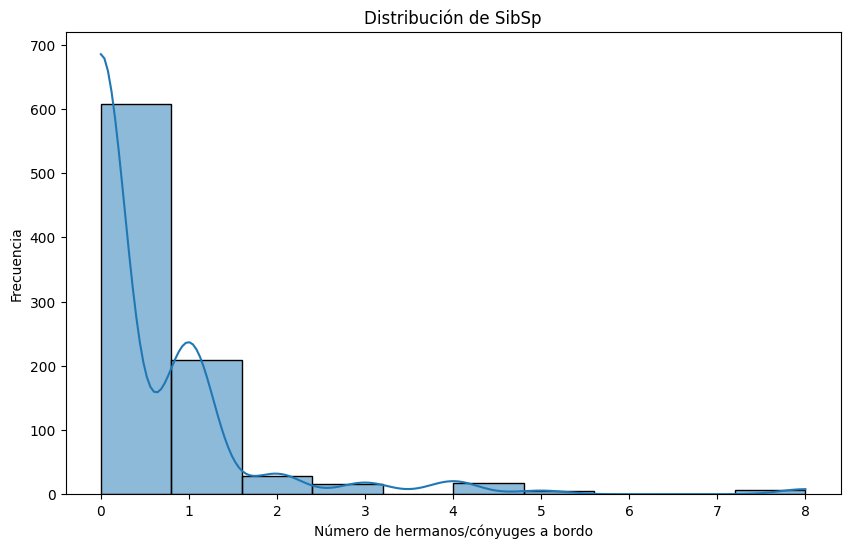


Asimetría de SibSp: 3.6953517271630565
Curtosis de SibSp: 17.880419726645968


In [13]:
# Tu código aquí para el ejercicio
import matplotlib.pyplot as plt
import seaborn as sns
# Ejemplo:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["SibSp"], kde=True, bins=10)
plt.title("Distribución de SibSp")
plt.xlabel("Número de hermanos/cónyuges a bordo")
plt.ylabel("Frecuencia")
plt.show()
print("\nAsimetría de SibSp:", df_cleaned["SibSp"].skew())
print("Curtosis de SibSp:", df_cleaned["SibSp"].kurtosis())

Comprender la asimetría y la curtosis es fundamental para decidir si se necesitan transformaciones de datos (como la transformación logarítmica para datos sesgados) antes de aplicar ciertos modelos de Machine Learning. También nos ayuda a entender mejor la naturaleza de las variables en nuestro dataset.

## 5. Visualización de Distribuciones: Histogramas, Cajas y Bigotes, y Violines

La visualización es una herramienta poderosa para entender la forma y las características de las distribuciones de nuestros datos. Complementa las medidas estadísticas y nos permite identificar patrones, valores atípicos y la simetría de las variables. En esta sección, generaremos diferentes tipos de gráficos para visualizar las distribuciones de las columnas numéricas de nuestro dataset del Titanic.

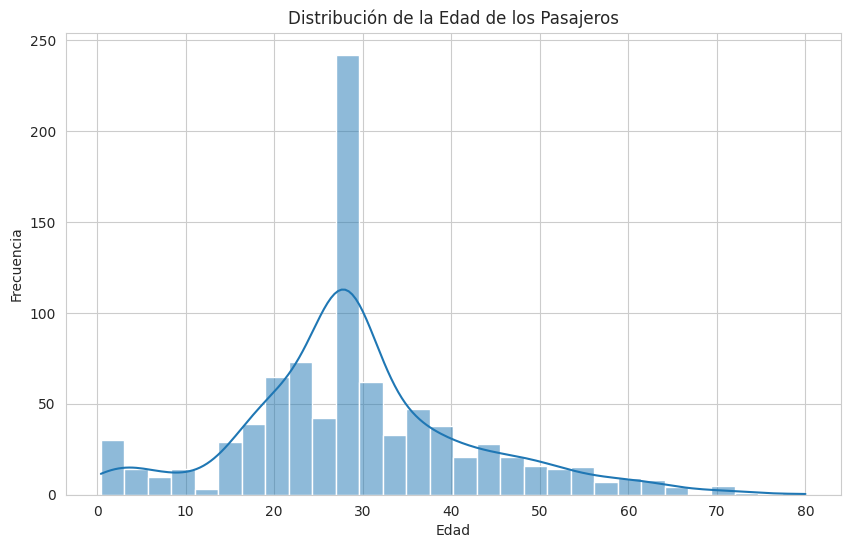

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización
sns.set_style("whitegrid")

# Histograma de la edad de los pasajeros
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Age"], kde=True, bins=30)
plt.title("Distribución de la Edad de los Pasajeros")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

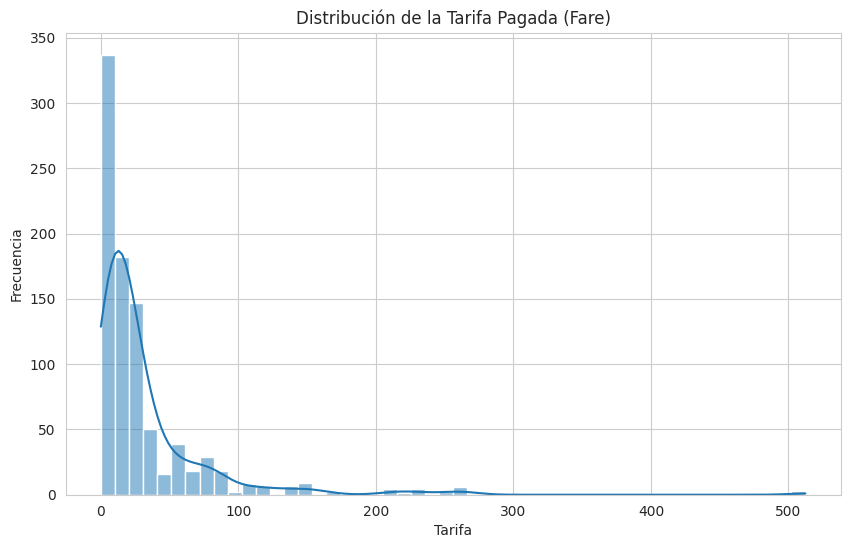

In [16]:
# Histograma de la tarifa pagada (Fare)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Fare"], kde=True, bins=50)
plt.title("Distribución de la Tarifa Pagada (Fare)")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.show()

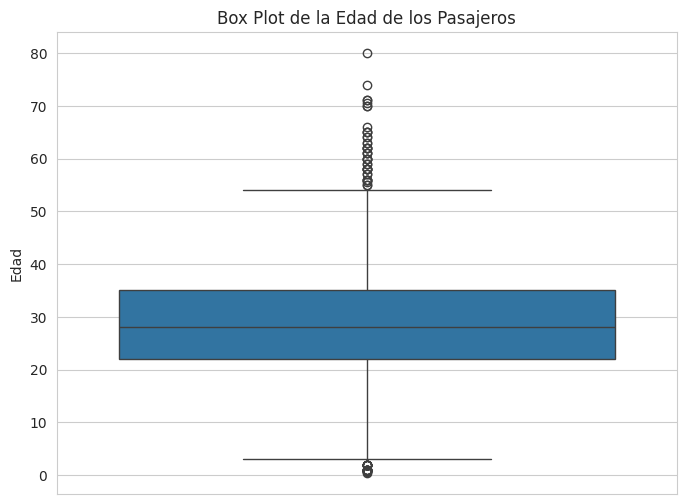

In [17]:
# Gráfico de Caja y Bigotes (Box Plot) para la Edad
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned["Age"])
plt.title("Box Plot de la Edad de los Pasajeros")
plt.ylabel("Edad")
plt.show()

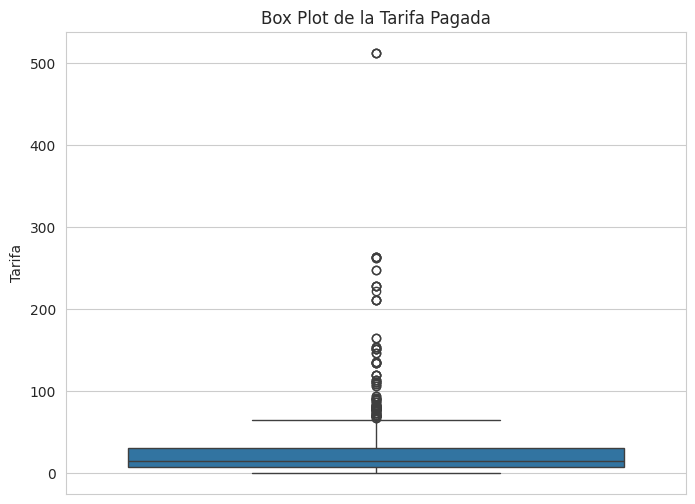

In [18]:
# Gráfico de Caja y Bigotes (Box Plot) para la Tarifa
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned["Fare"])
plt.title("Box Plot de la Tarifa Pagada")
plt.ylabel("Tarifa")
plt.show()

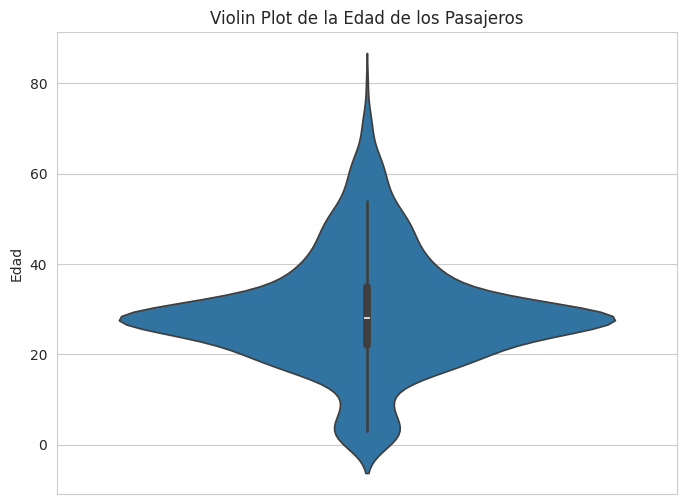

In [19]:
# Gráfico de Violín (Violin Plot) para la Edad
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_cleaned["Age"])
plt.title("Violin Plot de la Edad de los Pasajeros")
plt.ylabel("Edad")
plt.show()

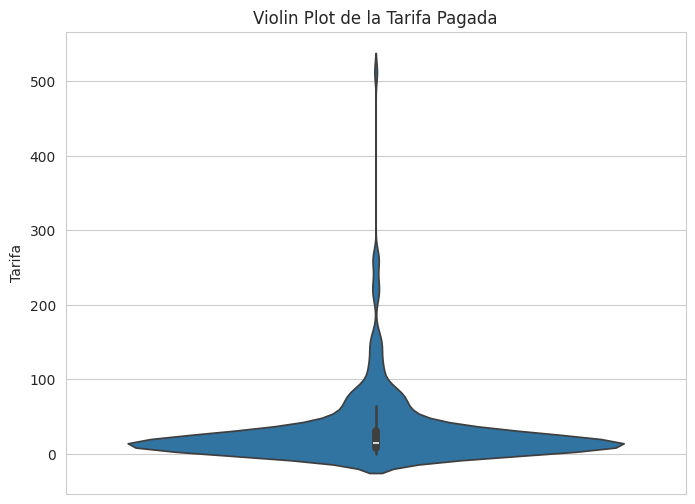

In [20]:
# Gráfico de Violín (Violin Plot) para la Tarifa
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_cleaned["Fare"])
plt.title("Violin Plot de la Tarifa Pagada")
plt.ylabel("Tarifa")
plt.show()

/tmp/ipython-input-24-3470642247.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  propinas_por_dia = tips.groupby("day")["tip"].sum().sort_values(ascending=False)
/tmp/ipython-input-24-3470642247.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


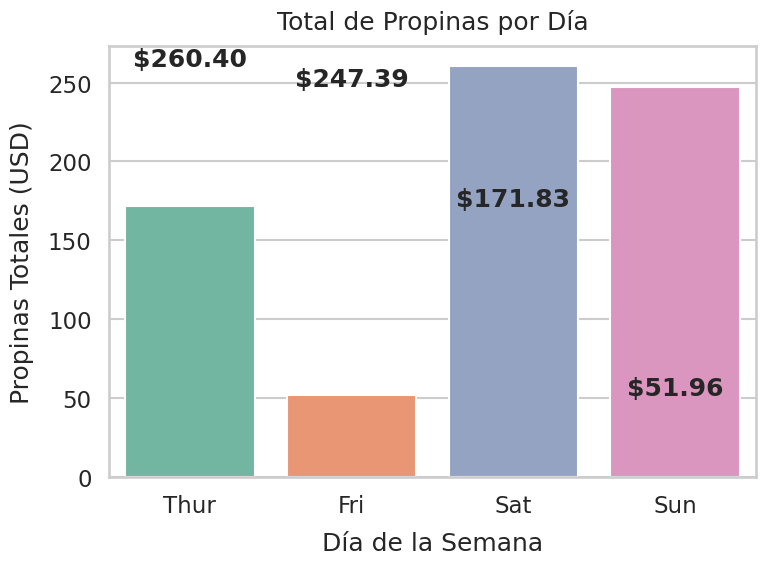

In [24]:
"""
Gráfico de barras; Ejemplo
Suma total de propinas por día de la semana
"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Estilo visual agradable
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

# Cargar datos
tips = sns.load_dataset("tips")

# Agrupar y ordenar
propinas_por_dia = tips.groupby("day")["tip"].sum().sort_values(ascending=False)

# Crear figura
plt.figure(figsize=(8, 6))
sns.barplot(
    x=propinas_por_dia.index,
    y=propinas_por_dia.values,
    palette="Set2"
)

# Etiquetas y título
plt.title("Total de Propinas por Día", fontsize=18, pad=12)
plt.xlabel("Día de la Semana", labelpad=10)
plt.ylabel("Propinas Totales (USD)", labelpad=10)

# Anotar los valores sobre cada barra
for i, v in enumerate(propinas_por_dia.values):
    plt.text(i, v + 0.2, f"${v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


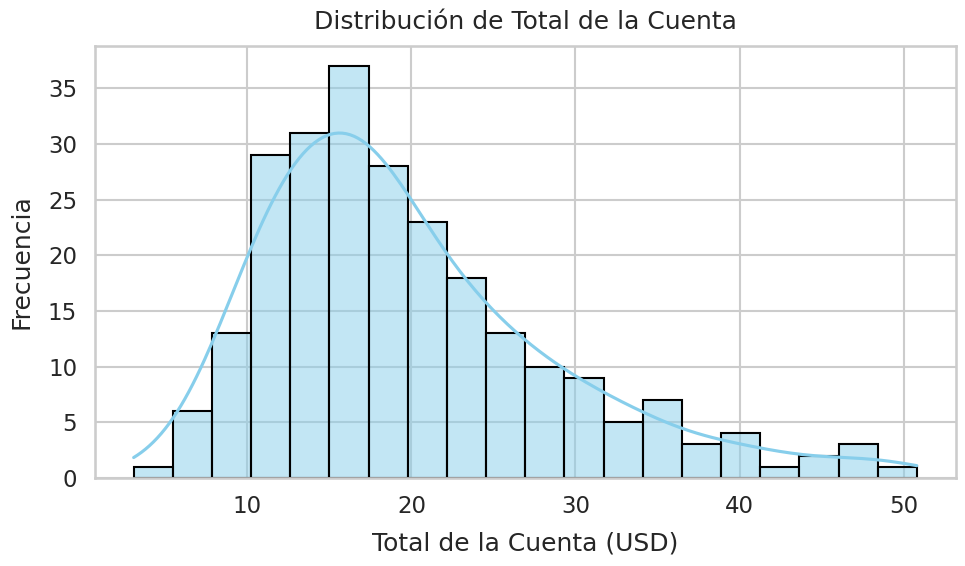

In [25]:
"""
Histograma: Ejemplo
Distribución de los montos totales de las cuentas
"""

import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set_theme(style="whitegrid", context="talk", palette="pastel")

# Cargar datos
tips = sns.load_dataset("tips")

# Crear figura
plt.figure(figsize=(10, 6))
sns.histplot(
    data=tips,
    x="total_bill",
    bins=20,
    kde=True,                   # Línea de densidad opcional
    color="skyblue",
    edgecolor="black"
)

# Título y etiquetas
plt.title("Distribución de Total de la Cuenta", fontsize=18, pad=12)
plt.xlabel("Total de la Cuenta (USD)", labelpad=10)
plt.ylabel("Frecuencia", labelpad=10)

# Mostrar
plt.tight_layout()
plt.show()


/tmp/ipython-input-22-2475084771.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas = tips.groupby("day")["total_bill"].median()


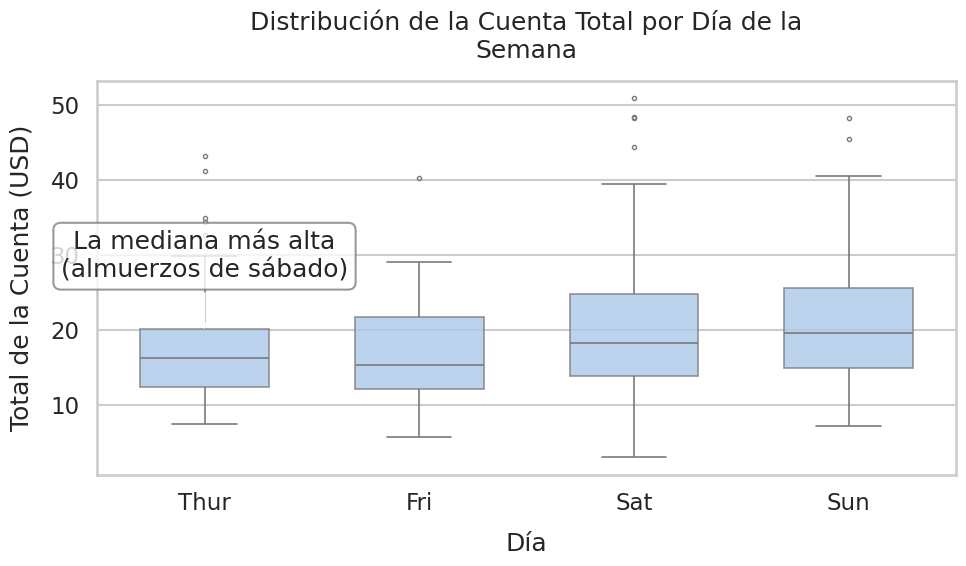

In [22]:
"""
Ejemplo : Boxplot

Objetivo:
    • Visualizar la distribución de la variable `total_bill`
      (total de la cuenta en un restaurante) por día de la semana.
    • Ilustrar cómo personalizar colores, títulos y anotaciones
      para que el gráfico sea informativo y agradable a la vista.
"""

# ─────────────────────────────
# 1. Importar librerías
# ─────────────────────────────
import seaborn as sns              # Biblioteca de visualización estadística
import matplotlib.pyplot as plt    # Backend de gráficos
import textwrap                    # Para ajustar texto en anotaciones

# Ajustes de estilo global para “bonito”
sns.set_theme(style="whitegrid", context="talk", palette="pastel")

# ─────────────────────────────
# 2. Cargar datos de ejemplo
# ─────────────────────────────
tips = sns.load_dataset("tips")

# ─────────────────────────────
# 3. Crear la figura y el eje
# ─────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot: `total_bill` vs `day`
sns.boxplot(
    data=tips,
    x="day",
    y="total_bill",
    dodge=True,
    ax=ax,
    width=0.6,           # Anchura de las cajas
    linewidth=1.2,       # Grosor de bordes
    fliersize=3,         # Tamaño de los “outliers”
    boxprops={"alpha": 0.8},
)

# ─────────────────────────────
# 4. Personalizar etiquetas y título
# ─────────────────────────────
ax.set_title("Distribución de la Cuenta Total por Día de la Semana", pad=16, fontsize=18)
ax.set_xlabel("Día", labelpad=12)
ax.set_ylabel("Total de la Cuenta (USD)", labelpad=12)

# ─────────────────────────────
# 5. Añadir anotaciones explicativas (opcional)
# ─────────────────────────────
# Ejemplo: subrayar la mediana más alta
medianas = tips.groupby("day")["total_bill"].median()
dia_max = medianas.idxmax()
y_max = medianas.max()

ax.annotate(
    "La mediana más alta\n(almuerzos de sábado)",
    xy=(list(tips["day"].unique()).index(dia_max), y_max),
    xytext=(0, 40),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="gray", alpha=0.8),
)

# Ajustar texto largo del título si fuera necesario
wrapped_title = "\n".join(textwrap.wrap(ax.get_title(), width=50))
ax.set_title(wrapped_title, pad=16)

# ─────────────────────────────
# 6. Mostrar el gráfico
# ─────────────────────────────
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-3764607017.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/tmp/ipython-input-23-3764607017.py:32: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(
/tmp/ipython-input-23-3764607017.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas = tips.groupby("day")["total_bill"].median()


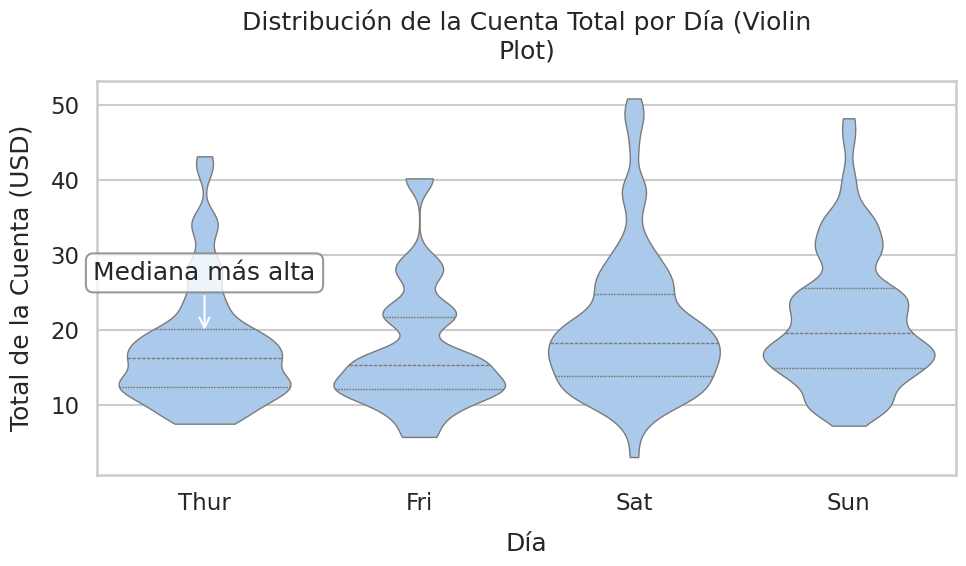

In [23]:
"""
Violin plot: Ejemplo

Objetivo:
    • Visualizar la distribución de `total_bill` (cuenta total)
      para cada día de la semana.
    • Aprovechar los violines para mostrar densidad, mediana y
      rango intercuartílico en un solo gráfico.
"""

# ─────────────────────────────
# 1. Importar librerías
# ─────────────────────────────
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Ajustes de estilo
sns.set_theme(style="whitegrid", context="talk", palette="pastel")

# ─────────────────────────────
# 2. Cargar datos de ejemplo
# ─────────────────────────────
tips = sns.load_dataset("tips")

# ─────────────────────────────
# 3. Crear la figura y el eje
# ─────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))

# Violin plot
sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    ax=ax,
    inner="quartile",   # Muestra Q1, Q2 (mediana) y Q3
    bw=0.2,             # Suavizado del KDE; <0.3 = más detalle
    linewidth=1,        # Grosor del contorno del violín
    cut=0,              # No extender más allá de los datos
    scale="width",      # Todos los violines con la misma anchura
)

# ─────────────────────────────
# 4. Etiquetas y título
# ─────────────────────────────
ax.set_title("Distribución de la Cuenta Total por Día (Violin Plot)", pad=16, fontsize=18)
ax.set_xlabel("Día", labelpad=12)
ax.set_ylabel("Total de la Cuenta (USD)", labelpad=12)

# ─────────────────────────────
# 5. Anotaciones opcionales
# ─────────────────────────────
medianas = tips.groupby("day")["total_bill"].median()
dia_max = medianas.idxmax()
y_max = medianas.max()

ax.annotate(
    "Mediana más alta",
    xy=(list(tips["day"].unique()).index(dia_max), y_max),
    xytext=(0, 38),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="gray", alpha=0.8),
)

# Ajustar título largo si fuera necesario
wrapped_title = "\n".join(textwrap.wrap(ax.get_title(), width=50))
ax.set_title(wrapped_title, pad=16)

# ─────────────────────────────
# 6. Mostrar
# ─────────────────────────────
plt.tight_layout()
plt.show()


**Interpretación de los gráficos:**

*   **Histogramas:** Muestran la forma general de la distribución, la presencia de picos y la asimetría. La curva KDE (Kernel Density Estimate) superpuesta ayuda a visualizar la densidad de probabilidad.
*   **Gráficos de Caja y Bigotes (Box Plots):** Son excelentes para visualizar la mediana, los cuartiles (Q1 y Q3), el rango intercuartílico (IQR) y la presencia de valores atípicos (outliers). La "caja" representa el 50% central de los datos, y los "bigotes" se extienden hasta 1.5 veces el IQR desde los cuartiles. Los puntos fuera de los bigotes son considerados atípicos.
*   **Gráficos de Violín (Violin Plots):** Combinan las características de un box plot con una estimación de la densidad de probabilidad (similar a un histograma suavizado). La "forma" del violín muestra la distribución de los datos, siendo más ancha donde hay mayor densidad de puntos. Son útiles para comparar distribuciones entre diferentes categorías o para visualizar la forma de la distribución junto con la mediana y los cuartiles.

#

## Ejercicio Práctico (Python):

1.  Elige otra columna numérica del dataset `df_cleaned` (por ejemplo, `SibSp` o `Parch`).
2.  Genera un histograma, un box plot y un violin plot para esa columna.
3.  Compara las visualizaciones y describe lo que cada tipo de gráfico te revela sobre la distribución de los datos en esa columna.

In [ ]:
python
# Tu código aquí para el ejercicio
# Ejemplo:
# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned["SibSp"], kde=True, bins=10)
# plt.title("Distribución de SibSp")
# plt.xlabel("Número de hermanos/cónyuges a bordo")
# plt.ylabel("Frecuencia")
# plt.show()
#
# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df_cleaned["SibSp"])
# plt.title("Box Plot de SibSp")
# plt.ylabel("Número de hermanos/cónyuges a bordo")
# plt.show()
#
# plt.figure(figsize=(8, 6))
# sns.violinplot(y=df_cleaned["SibSp"])
# plt.title("Violin Plot de SibSp")
# plt.ylabel("Número de hermanos/cónyuges a bordo")
# plt.show()

## 6. Escalado de Datos: Normalización y Estandarización en la Práctica

Como se discutió en la introducción, el escalado de datos es un paso crucial para preparar nuestras características numéricas para los algoritmos de Machine Learning. En esta sección, aplicaremos las técnicas de normalización (Min-Max Scaling) y estandarización (Z-score Scaling) a una de las columnas numéricas de nuestro dataset del Titanic y visualizaremos el impacto de estas transformaciones.

Utilizaremos la columna `Fare` (tarifa pagada) para este ejemplo, ya que demostró una fuerte asimetría positiva y una alta curtosis, lo que la convierte en una candidata ideal para observar el efecto del escalado.

#

## Normalización (Min-Max Scaling) con Python

La normalización Min-Max transforma los datos para que se encuentren en un rango específico, típicamente entre 0 y 1. Esto se logra restando el valor mínimo y dividiendo por el rango (máximo - mínimo).


Primeras 5 filas de la columna Fare Normalizada:
      Fare  Fare_Normalized
0   7.2500         0.014151
1  71.2833         0.139136
2   7.9250         0.015469
3  53.1000         0.103644
4   8.0500         0.015713

Estadísticas descriptivas de Fare Normalizada:
count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare_Normalized, dtype: float64


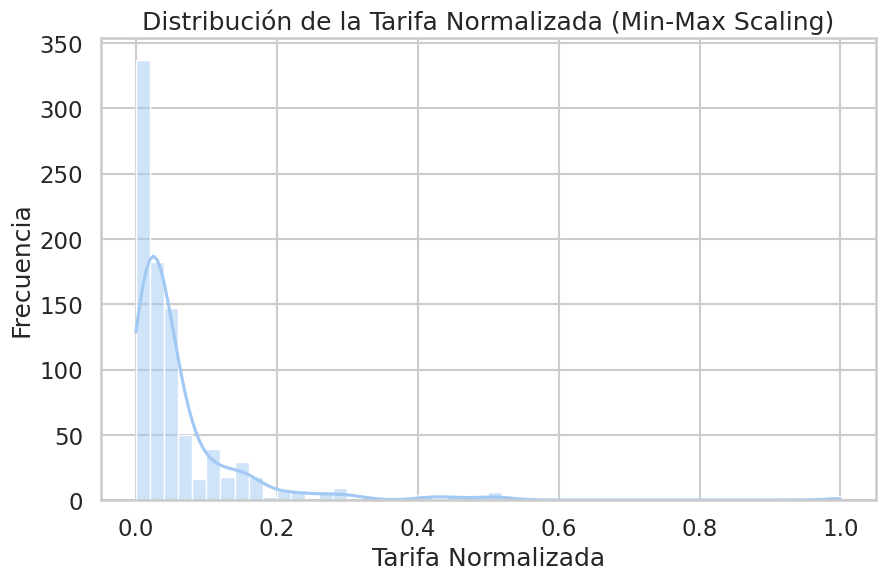

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Crear una copia del DataFrame para no modificar el original
df_scaled = df_cleaned.copy()

# Inicializar el MinMaxScaler
min_max_scaler = MinMaxScaler()

# Aplicar la normalización a la columna 'Fare'
# Reshape(-1, 1) es necesario porque el scaler espera una entrada 2D
df_scaled["Fare_Normalized"] = min_max_scaler.fit_transform(df_scaled[["Fare"]])

print("\nPrimeras 5 filas de la columna Fare Normalizada:")
print(df_scaled[["Fare", "Fare_Normalized"]].head())

print("\nEstadísticas descriptivas de Fare Normalizada:")
print(df_scaled["Fare_Normalized"].describe())

# Visualizar la distribución de la tarifa normalizada
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled["Fare_Normalized"], kde=True, bins=50)
plt.title("Distribución de la Tarifa Normalizada (Min-Max Scaling)")
plt.xlabel("Tarifa Normalizada")
plt.ylabel("Frecuencia")
plt.show()

**Observaciones:**

*   Los valores de `Fare_Normalized` ahora se encuentran en el rango de 0 a 1.
*   La forma de la distribución (su asimetría y curtosis) no ha cambiado; la normalización solo cambia la escala de los datos, no su forma.

#

## Estandarización (Z-score Scaling) con Python

La estandarización (Z-score Scaling) transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos que asumen una distribución normal o son sensibles a la varianza.


Primeras 5 filas de la columna Fare Estandarizada:
      Fare  Fare_Standardized
0   7.2500          -0.502445
1  71.2833           0.786845
2   7.9250          -0.488854
3  53.1000           0.420730
4   8.0500          -0.486337

Estadísticas descriptivas de Fare Estandarizada:
count    8.910000e+02
mean     3.987333e-18
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare_Standardized, dtype: float64


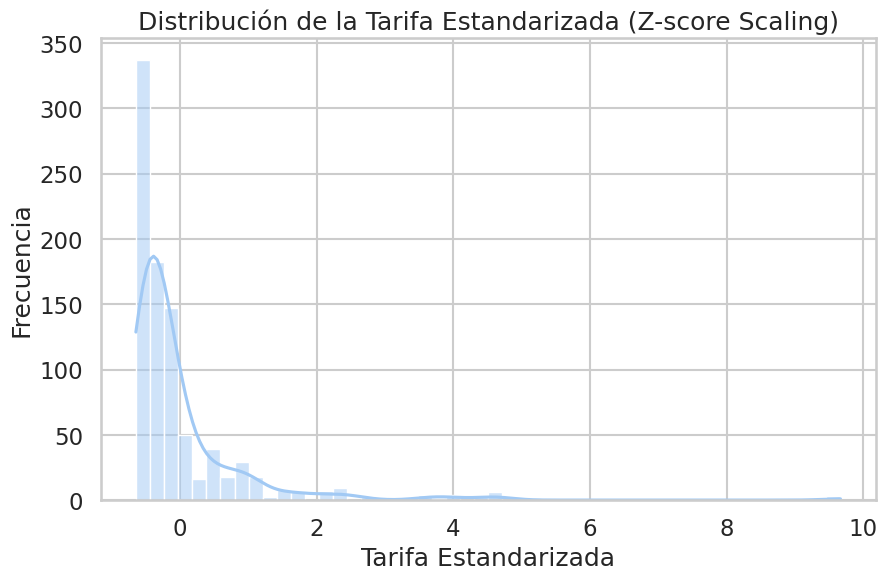

In [28]:
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame para no modificar el original
df_scaled_std = df_cleaned.copy()

# Inicializar el StandardScaler
standard_scaler = StandardScaler()

# Aplicar la estandarización a la columna 'Fare'
df_scaled_std["Fare_Standardized"] = standard_scaler.fit_transform(df_scaled_std[["Fare"]])

print("\nPrimeras 5 filas de la columna Fare Estandarizada:")
print(df_scaled_std[["Fare", "Fare_Standardized"]].head())

print("\nEstadísticas descriptivas de Fare Estandarizada:")
print(df_scaled_std["Fare_Standardized"].describe())

# Visualizar la distribución de la tarifa estandarizada
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled_std["Fare_Standardized"], kde=True, bins=50)
plt.title("Distribución de la Tarifa Estandarizada (Z-score Scaling)")
plt.xlabel("Tarifa Estandarizada")
plt.ylabel("Frecuencia")
plt.show()

**Observaciones:**

*   Los valores de `Fare_Standardized` ahora tienen una media cercana a 0 y una desviación estándar cercana a 1.
*   Al igual que con la normalización, la forma de la distribución no ha cambiado. La estandarización reescala los datos manteniendo su forma original.

#

## Comparación Visual de las Transformaciones

Para apreciar mejor el efecto de ambas transformaciones, podemos visualizar las distribuciones originales, normalizadas y estandarizadas en un mismo gráfico o en gráficos adyacentes.

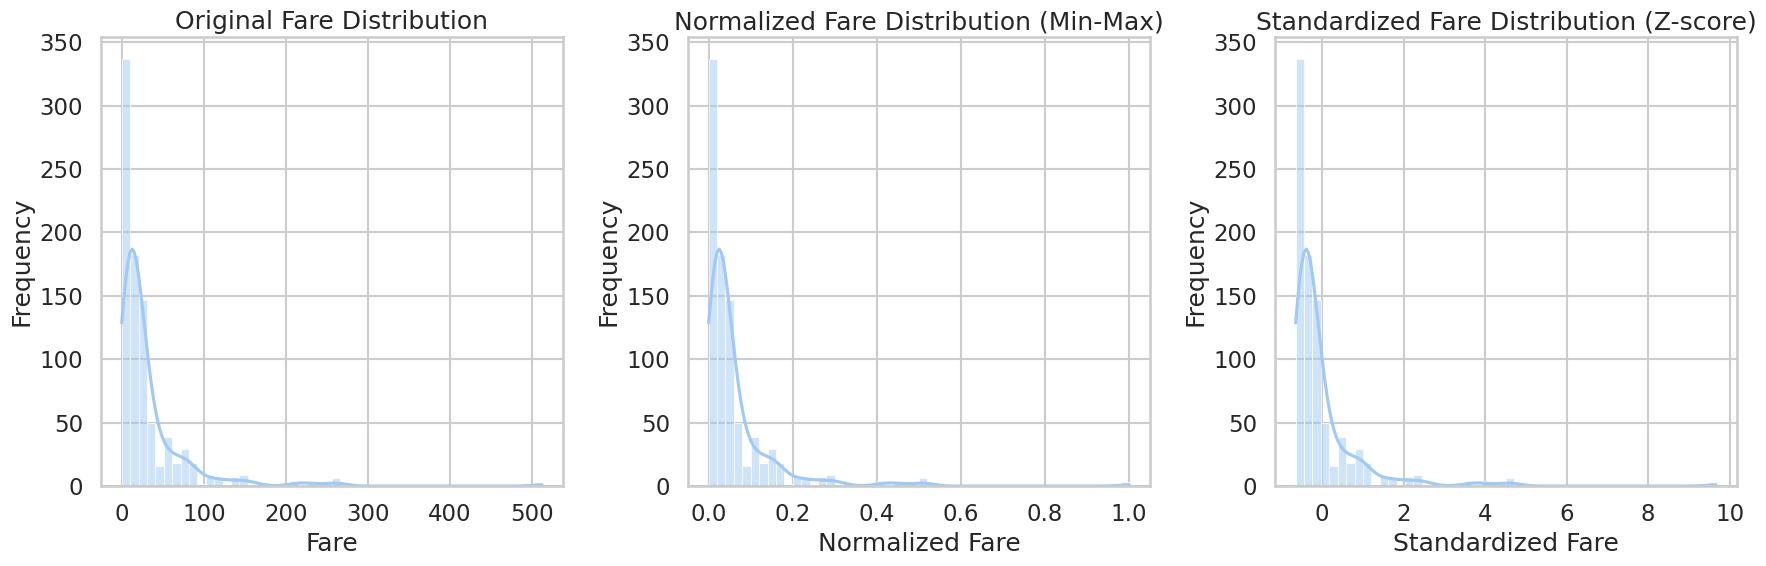

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned["Fare"], kde=True, bins=50)
plt.title("Original Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(df_scaled["Fare_Normalized"], kde=True, bins=50)
plt.title("Normalized Fare Distribution (Min-Max)")
plt.xlabel("Normalized Fare")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(df_scaled_std["Fare_Standardized"], kde=True, bins=50)
plt.title("Standardized Fare Distribution (Z-score)")
plt.xlabel("Standardized Fare")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#

## Ejercicio Práctico (Python):

1.  Selecciona la columna `Age` del dataset `df_cleaned`.
2.  Aplica tanto la normalización Min-Max como la estandarización Z-score a esta columna.
3.  Muestra las primeras filas de las nuevas columnas transformadas.
4.  Calcula las estadísticas descriptivas (media, desviación estándar, min, max) para ambas columnas transformadas y verifica que los resultados sean los esperados.
5.  Crea histogramas para visualizar la distribución de la `Age` original, normalizada y estandarizada, y compara sus formas y rangos.

In [ ]:
# Tu código aquí para el ejercicio
# Ejemplo:
# df_age_scaled = df_cleaned.copy()
# min_max_scaler_age = MinMaxScaler()
# df_age_scaled["Age_Normalized"] = min_max_scaler_age.fit_transform(df_age_scaled[["Age"]])
# standard_scaler_age = StandardScaler()
# df_age_scaled["Age_Standardized"] = standard_scaler_age.fit_transform(df_age_scaled[["Age"]])
# print(df_age_scaled[["Age", "Age_Normalized", "Age_Standardized"]].head())
# print(df_age_scaled[["Age_Normalized", "Age_Standardized"]].describe())
# plt.figure(figsize=(18, 6))
# plt.subplot(1, 3, 1)
# sns.histplot(df_age_scaled["Age"], kde=True, bins=30)
# plt.title("Original Age Distribution")
# plt.subplot(1, 3, 2)
# sns.histplot(df_age_scaled["Age_Normalized"], kde=True, bins=30)
# plt.title("Normalized Age Distribution")
# plt.subplot(1, 3, 3)
# sns.histplot(df_age_scaled["Age_Standardized"], kde=True, bins=30)
# plt.title("Standardized Age Distribution")
# plt.tight_layout()
# plt.show()

La elección entre normalización y estandarización dependerá de las características específicas de tu dataset y de los requisitos del algoritmo de Machine Learning que vayas a utilizar. Es fundamental comprender cómo cada técnica afecta tus datos para tomar la decisión más informada.

## 7. Integración de Código en R y Ejercicios Complementarios

Google Colab es una plataforma versátil que no solo soporta Python, sino también R. Esto nos permite aprovechar las fortalezas de ambos lenguajes en un mismo entorno. En esta sección, replicaremos algunos de los pasos de limpieza de datos, análisis de distribución, asimetría, curtosis, normalización y estandarización utilizando R, para ofrecer una perspectiva diferente y complementar los ejemplos en Python.



## Configuración de R en Google Colab

Para usar R en un cuaderno de Colab, simplemente necesitas cambiar el entorno de ejecución. Ve a `Entorno de ejecución > Cambiar tipo de entorno de ejecución` y selecciona `R` en el desplegable `Tipo de entorno de ejecución`. Una vez hecho esto, las celdas de código se ejecutarán como código R.

**Nota:** Para este cuaderno, mantendremos el entorno de ejecución en Python y usaremos la extensión `%%R` para ejecutar bloques de código R dentro de celdas de Python. Esto es útil si deseas combinar ambos lenguajes en un solo cuaderno.



## Carga del Dataset y Exploración Inicial en R

Primero, cargaremos el dataset del Titanic en R y realizaremos una exploración inicial. Necesitaremos instalar y cargar la librería `readr` para leer archivos CSV.

In [ ]:
# Instalar y cargar la librería readr si no está instalada
if (!require(readr)) {
  install.packages("readr")
  library(readr)
}

# Cargar el dataset del Titanic
df_r <- read_csv("titanic.csv")

# Mostrar las primeras filas del dataset
cat("Primeras 5 filas del dataset en R:\n")
print(head(df_r))

# Mostrar la estructura del dataset
cat("\nEstructura del dataset en R:\n")
print(str(df_r))

# Mostrar un resumen estadístico
cat("\nResumen estadístico del dataset en R:\n")
print(summary(df_r))

## Manejo de Valores Faltantes en R

En R, el manejo de valores faltantes (`NA`) es similar al de Python. Identificaremos y trataremos los valores faltantes en las columnas `Age`, `Cabin` y `Embarked`.

In [ ]:
# Contar valores faltantes por columna
cat("\nValores faltantes por columna en R:\n")
print(colSums(is.na(df_r)))

# Estrategia 1: Eliminar la columna 'Cabin'
df_r_cleaned <- subset(df_r, select = -c(Cabin))
cat("\nDataset después de eliminar la columna Cabin en R:\n")
print(head(df_r_cleaned))

# Estrategia 2: Imputar valores faltantes en 'Age' con la mediana
df_r_cleaned$Age[is.na(df_r_cleaned$Age)] <- median(df_r_cleaned$Age, na.rm = TRUE)
cat("\nValores faltantes en Age después de la imputación en R:\n")
print(sum(is.na(df_r_cleaned$Age)))

# Estrategia 3: Imputar valores faltantes en 'Embarked' con la moda
# La moda en R para factores se puede encontrar con table y which.max
mode_embarked <- names(which.max(table(df_r_cleaned$Embarked)))
df_r_cleaned$Embarked[is.na(df_r_cleaned$Embarked)] <- mode_embarked
cat("\nValores faltantes en Embarked después de la imputación en R:\n")
print(sum(is.na(df_r_cleaned$Embarked)))

# Verificar que no queden valores faltantes
cat("\nValores faltantes finales por columna en R:\n")
print(colSums(is.na(df_r_cleaned)))

## Análisis de Distribución, Asimetría y Curtosis en R

Para calcular la asimetría y la curtosis en R, a menudo se utiliza el paquete `e1071`. Visualizaremos las distribuciones con histogramas.

In [ ]:
# Instalar y cargar la librería e1071 si no está instalada
if (!require(e1071)) {
  install.packages("e1071")
  library(e1071)
}

# Histograma de la Edad
hist(df_r_cleaned$Age, main="Distribución de la Edad de los Pasajeros (R)",
     xlab="Edad", ylab="Frecuencia", col="skyblue", border="black")

# Histograma de la Tarifa
hist(df_r_cleaned$Fare, main="Distribución de la Tarifa Pagada (R)",
     xlab="Tarifa", ylab="Frecuencia", col="lightgreen", border="black")

# Calcular la asimetría
cat("\nAsimetría (Skewness) en R:\n")
print(skewness(df_r_cleaned$Age))
print(skewness(df_r_cleaned$Fare))

# Calcular la curtosis
cat("\nCurtosis (Kurtosis) en R:\n")
print(kurtosis(df_r_cleaned$Age))
print(kurtosis(df_r_cleaned$Fare))

## Normalización y Estandarización en R

En R, podemos realizar normalización y estandarización utilizando funciones base o paquetes como `caret`.

In [ ]:
# Normalización (Min-Max Scaling) para Fare
min_val <- min(df_r_cleaned$Fare)
max_val <- max(df_r_cleaned$Fare)
df_r_cleaned$Fare_Normalized <- (df_r_cleaned$Fare - min_val) / (max_val - min_val)

cat("\nPrimeras 5 filas de la columna Fare Normalizada en R:\n")
print(head(df_r_cleaned[, c("Fare", "Fare_Normalized")]))

# Estandarización (Z-score Scaling) para Fare
mean_val <- mean(df_r_cleaned$Fare)
sd_val <- sd(df_r_cleaned$Fare)
df_r_cleaned$Fare_Standardized <- (df_r_cleaned$Fare - mean_val) / sd_val

cat("\nPrimeras 5 filas de la columna Fare Estandarizada en R:\n")
print(head(df_r_cleaned[, c("Fare", "Fare_Standardized")]))

# Visualizar las distribuciones transformadas en R
par(mfrow=c(1, 2)) # Configurar para 1 fila, 2 columnas de gráficos
hist(df_r_cleaned$Fare_Normalized, main="Tarifa Normalizada (R)", xlab="", col="lightblue", border="black")
hist(df_r_cleaned$Fare_Standardized, main="Tarifa Estandarizada (R)", xlab="", col="lightcoral", border="black")

## Ejercicio Práctico (R):

1.  Selecciona la columna `Age` del dataset `df_r_cleaned`.
2.  Aplica tanto la normalización Min-Max como la estandarización Z-score a esta columna en R.
3.  Muestra las primeras filas de las nuevas columnas transformadas.
4.  Calcula las estadísticas descriptivas (media, desviación estándar, min, max) para ambas columnas transformadas y verifica que los resultados sean los esperados.
5.  Crea histogramas para visualizar la distribución de la `Age` original, normalizada y estandarizada en R, y compara sus formas y rangos.

In [ ]:
# Tu código aquí para el ejercicio en R
# Ejemplo:
# min_val_age <- min(df_r_cleaned$Age)
# max_val_age <- max(df_r_cleaned$Age)
# df_r_cleaned$Age_Normalized <- (df_r_cleaned$Age - min_val_age) / (max_val_age - min_val_age)
#
# mean_val_age <- mean(df_r_cleaned$Age)
# sd_val_age <- sd(df_r_cleaned$Age)
# df_r_cleaned$Age_Standardized <- (df_r_cleaned$Age - mean_val_age) / sd_val_age
#
# cat("\nPrimeras 5 filas de la columna Age Normalizada y Estandarizada en R:\n")
# print(head(df_r_cleaned[, c("Age", "Age_Normalized", "Age_Standardized")]))
#
# par(mfrow=c(1, 2))
# hist(df_r_cleaned$Age_Normalized, main="Edad Normalizada (R)", xlab="", col="lightblue", border="black")
# hist(df_r_cleaned$Age_Standardized, main="Edad Estandarizada (R)", xlab="", col="lightcoral", border="black")

Esta sección demuestra cómo las mismas tareas de preprocesamiento y análisis pueden realizarse en R, proporcionando flexibilidad y opciones para los científicos de datos que trabajan con ambos lenguajes. La elección entre Python y R a menudo se reduce a la preferencia personal, la disponibilidad de librerías específicas o los requisitos del proyecto.